**Intro:**

One of the most prominent debates in the modern music landscape has little to do with music itself, but rather the streaming platforms music is offered on. Spotify and Apple Music have became the two titans of the industry, and many listeners are loyal fans of one or another. I have been a Spotify user for over 5 years and been very satisfied with the service, but I decided to take a look at app store reviews to get a glimpse of why some users feel differently, or agree. 

 Data Source: 

This data is 60,000+ Google Play Store reviews of the Spotify app spanning from Jan 1, 2022 to July 9, 2022 from Kaggle user M FAARISUL ILMI. Found here: https://www.kaggle.com/datasets/mfaaris/spotify-app-reviews-2022

Objectives:

1) Analyze distrobution of reviews and most popular reviews

2) Use TF-IDF to find most common words and phrases in reviews with good, ok and poor ratings

3) Use CountVectorizer and TF-IDF classification to predict review sentiment

In [ ]:
import pandas as pd
import string
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import numpy as np
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spot = pd.read_csv("/content/drive/MyDrive/Kaggle/reviews.csv")
spot.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
no_digits = []
# Iterate through the string, adding non-numbers to the no_digits list
for i in spot['Review']:
  if not i.isdigit():
         no_digits.append(i)

# Now join all elements of the list with '', 
# which puts all of the characters together.
result = ''.join(no_digits)

spot['text_nodigit'] = pd.Series(no_digits)
spot.head()


,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality..."
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,"This pop-up ""Get the best Spotify experience o..."
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN,Really buggy and terrible to use as of recently
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN,Dear Spotify why do I get songs that I didn't ...


In [ ]:
#oooh punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# a list to store non-punctuation words
non_punct = []

# loops through each sentence in the `text` column and then checks each word in the text
# keeps it in the letters list if non-punctuation
for word in spot['text_nodigit']:
    letters = [letter for letter in word if letter not in string.punctuation and not letter.isdigit()]
    non_punct.append(''.join(letters))

spot['text_non_punct'] = pd.Series(non_punct)
spot.head(2)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality...",Great music service the audio is high quality ...
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...,Please ignore previous negative rating This ap...


In [ ]:
# a list to store tokens
tokens = []

# loops through each sentence in the `title_non_punct` column and then 
# splits on one or more non-word character and then 
# also converts each word in the title to lowercase
for word in spot['text_non_punct']:
    split_words = re.split("\W+",word)
    tokens.append([word.lower() for word in split_words])


spot['text_non_punct_split'] = pd.Series(tokens)
spot.head(2)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct,text_non_punct_split
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality...",Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ..."
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t..."


In [ ]:
stopword = nltk.corpus.stopwords.words('english')
stopword.append('app')
stopword.append('music')
stopword.append('spotify')
# pring the first 11 stop words in the list
print(stopword[170:])

["shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", 'app', 'music', 'spotify']


In [ ]:
# a list to store stopwords
stopwords = []

# loops through each sentence in the `title_non_punct_split` column and then 
# stores words in a list of non_stop if the word is not a stopword
# then finally appends each list into stopwords
for title in spot['text_non_punct_split']:
    non_stop = [word for word in title if word not in stopword]
    stopwords.append(non_stop)

spot['text_non_punct_split_non_stopwords'] = pd.Series(stopwords)
spot.head(2)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct,text_non_punct_split,text_non_punct_split_non_stopwords
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality...",Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, service, audio, high, quality, easy, u..."
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, s..."


In [ ]:
ps = PorterStemmer()
# a list to store stemmed words
stemmed_list = []

# loops through each sentence in the `title_non_punct_split_wo_stopwords` column and then 
# creates a list 'stemmed_list' to store the stemmed version of each word 
for title in spot['text_non_punct_split_non_stopwords']:
    stemmed = [ps.stem(word) for word in title ]
    stemmed_list.append(stemmed)

spot['text_non_punct_split_non_stopwords_digits_stemmed'] = pd.Series(stemmed_list)
spot.head(2)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct,text_non_punct_split,text_non_punct_split_non_stopwords,text_non_punct_split_non_stopwords_digits_stemmed
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality...",Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, service, audio, high, quality, easy, u...","[great, servic, audio, high, qualiti, easi, us..."
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, s...","[pleas, ignor, previou, neg, rate, super, grea..."


In [ ]:
spot['text_plain_final'] = [' '.join(map(str, e)) for e in spot['text_non_punct_split_non_stopwords_digits_stemmed']]
spot.head(3)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct,text_non_punct_split,text_non_punct_split_non_stopwords,text_non_punct_split_non_stopwords_digits_stemmed,text_plain_final
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN,"Great music service, the audio is high quality...",Great music service the audio is high quality ...,"[great, music, service, the, audio, is, high, ...","[great, service, audio, high, quality, easy, u...","[great, servic, audio, high, qualiti, easi, us...",great servic audio high qualiti easi use also ...
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN,Please ignore previous negative rating. This a...,Please ignore previous negative rating This ap...,"[please, ignore, previous, negative, rating, t...","[please, ignore, previous, negative, rating, s...","[pleas, ignor, previou, neg, rate, super, grea...",pleas ignor previou neg rate super great give ...
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN,"This pop-up ""Get the best Spotify experience o...",This popup Get the best Spotify experience on ...,"[this, popup, get, the, best, spotify, experie...","[popup, get, best, experience, android, annoyi...","[popup, get, best, experi, android, annoy, ple...",popup get best experi android annoy pleas let ...


In [ ]:
belowfour = spot[spot['Rating']<3.5]
worst = spot[spot['Rating']<1.5]
poor = belowfour[belowfour['Rating']>1.5]
good = spot[spot['Rating']>3.5]
poor.head(4)

,Time_submitted,Review,Rating,Total_thumbsup,Reply,text_nodigit,text_non_punct,text_non_punct_split,text_non_punct_split_non_stopwords,text_non_punct_split_non_stopwords_digits_stemmed,text_plain_final
5,2022-07-09 13:20:20,The player controls sometimes disappear for no...,3,7,NaN,The player controls sometimes disappear for no...,The player controls sometimes disappear for no...,"[the, player, controls, sometimes, disappear, ...","[player, controls, sometimes, disappear, reaso...","[player, control, sometim, disappear, reason, ...",player control sometim disappear reason restar...
7,2022-07-09 13:17:22,Still extremely slow when changing storage to ...,3,16,NaN,Still extremely slow when changing storage to ...,Still extremely slow when changing storage to ...,"[still, extremely, slow, when, changing, stora...","[still, extremely, slow, changing, storage, ex...","[still, extrem, slow, chang, storag, extern, s...",still extrem slow chang storag extern sd card ...
10,2022-07-09 13:11:17,"Love Spotify, and usually this app is the best...",2,1,NaN,"Love Spotify, and usually this app is the best...",Love Spotify and usually this app is the best ...,"[love, spotify, and, usually, this, app, is, t...","[love, usually, best, others, stated, control,...","[love, usual, best, other, state, control, but...",love usual best other state control button dis...
16,2022-07-09 13:00:22,Android user - there are loads of glitches wit...,2,0,NaN,Android user - there are loads of glitches wit...,Android user there are loads of glitches with...,"[android, user, there, are, loads, of, glitche...","[android, user, loads, glitches, player, bar, ...","[android, user, load, glitch, player, bar, dis...",android user load glitch player bar disappear ...


## **Surface Analysis**

In [ ]:
spot['Rating'].value_counts()

5    22095
1    17653
4     7842
2     7118
3     6886
Name: Rating, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbfb406d0>]],
      dtype=object)

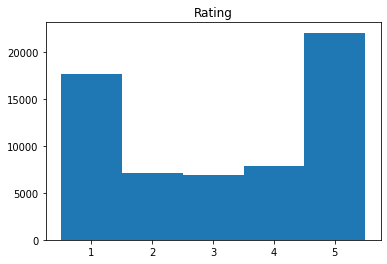

In [ ]:
spot.hist(bins=5,column='Rating',range=[0.5, 5.5],grid=False)

In [ ]:
len(spot.index)

61594

In [ ]:
pd.set_option('display.max_colwidth', None)

worst[['Total_thumbsup','Review','Rating']].sort_values(by='Total_thumbsup',ascending=False)[:12]

,Total_thumbsup,Review,Rating
37523,6026,Forever glitchy. App play button and current song playing disappears and i have to constantly restart the app. This app has a great track record of poor updates.,1
45292,2921,"I have been using Spotify for over 2 years. It has been working fine until last 2 weeks. Since then whenever I am trying to search for the songs, it displays ""Couldn't find the song. Please go online and try again"" eventhough the internet connectivity is completely fine. Also when I logged out from the App to login again, it was not logging me back. I know Spotify had some issue last week but this issue happened way before that and is still there. Please look into it. This is really not done.",1
40840,2721,"Very poor experience with the free version. I can't even search and play a song . They are allowing only 6 skips in an hour. And if we search for a song the app is giving a play list ( Not the exact song). We can't even see what all songs included in that list. We should skip too many songs to find the song which we are looking for . As i told before, they are allowing only 6 skips in an hour, its not possible to find the song we need to play. Nice strategy dear SPORTIFY. Anyway UNINSTALLING!!!",1
20832,2137,"Do you like your music streaming app that you're paying for crashing more often than necessary? Then Spotify is the perfect choice for you! Even with the screen turned off, it'll just crash and force me to reopen the app and restart the music in the middle of work. But if the app crashing wasn't good enough for you, if you have android 12, Spotify will just beg for more Bluetooth permissions than necessary, and the team is aware of this, but are working at a snails pace to get it fixed.",1
23675,1899,"I'm using the paid version and I can barely use the app most of the time. The screen is blank, I'm told I'm not connected to my network, search doesn't work, nothing loads, issues syncing with Alexa, i click on a song in a playlist and a completely random song plays. This is beginning to be extremely frustrating. I might have to shift to apple or prime at this rate.",1
47719,1779,"I am unable to log in to my account from my Google pixel 6. I tried several time reinstalling the app but it shows the Spotify logo screen and thats all nothing much thereafter. Primarily the reason was that I couldn't search for songs in the app as it was always showing 'no internet connection available', but I had no issues with the connection. Due to this i tried uninstalling and reinstalling the app but now I am unable to login. Kindly help me with this.",1
25464,1692,"I have been using Spotify for a very long time now, it's always been my number one music player. But in 2022, I find myself browsing the playstore looking for a new music player. The glitches, sometimes it charge me twice in one month. Plus, I've recommended a 3rd of people I know to spotify and half of them have left because of the issues, I'm so disappointed 😥..",1
53252,1447,"After the update, Spotify increased its ads. Wasn't going to complain about it because this has been happening since forever, but initially after watching the ""watch this short video to get 30 mins of ad free music"" ad, at least we could listen to ad free music for some time. But after the update, even when I listened to those long ads to get ad-free music for some time, they have been coming literally after every single song! I feel cheated",1
31815,1297,"I originally rated this 5 stars, but the service is horrible. We have a family (2) plus plan and my partner who has a completely different type of phone is having the same issues. The mobile app constantly crashes, seemingly at the worst of times when I can't get to/voice my phone to open my streaming back up. The controls disappear off the phone and your music/pod just stop. I already did the recent update but it didn't seem to help. Going to need to find a more reliable music service.",1
58538,1050,"Very poor experience, every time

In [ ]:
poor[['Total_thumbsup','Review','Rating']].sort_values(by='Total_thumbsup',ascending=False)[:25]

,Total_thumbsup,Review,Rating
36670,4749,"Edit April 13: the reliability and stability of Spotify has absolutely plummeted. I don't know if it's the Spotify app, the new Android OS, or a combination of both. But I've lost a lot of faith in it within these last few months. I don't like subscription based apps. But this one to me is justifiable. Seamless transitions from phone, to pc, to Xbox, to Bluetooth in my vehicle. It rarely has issues and obviously has the widest selection of music. Hands down best way to listen to music or talks.",3
31102,4550,"The app is really incredible and allows you to pick from so many different genres.It also allows you to watch episodes and make your own playlists and has specific topics for you to listen from. The only cons are: *You can't even listen to ""a"" song without upgrading to premium if there is no internet connection. *Even though it says once in 30 minutes there is an ad,it appears once in 10-15 minutes. This app is helpful and motivational....",3
11953,4267,"The sound quality is amazing , I've been using the app for some time now. There is a major issue with the network and loading , all other apps (including other music apps) work absolutely fine on my phone with the current network. Except Spotify , it doesn't load at all. After many attempts at restarting the app , it sometimes works well. No problems with any other features though 👍",2
51499,2945,"Yes, like all, it's those constant ads. Initially it was 2 ads per 4 or 5 songs, then it was 2 ads per 2 or 3 songs. It was still fine. But now, its 3 ads per 2 or 3 songs and it's frustrating. Not all can afford or would like to take a premium. So kindly look after the ads. Apart from that I'd prefer spotify because it introduced me to different artist with the kind of music I listen to. Also, spotify streams means a lot to an artist's career as well. PS, stream Walls by Louis Tomlinson.",3
44953,2907,"I'm facing lot of bugs on my mobile. I subscribed to premium to get the premium experience of Spotify. I tried reinstalling many times. But it doesn't get resolved. I'm changing my rating from 5 to 3. I'm facing these kinda issues recently. 1. When I click clear on recent search, it doesn't clear the list. 2. When I skip the song, sometimes it takes some time to change to next song. And I can't remember some bugs.",3
8443,2744,"This app has great sound quality and is easy to use. I enjoy it. But I don't like how you have limited skips if you're a free listener and can't pick what song to play, the entire playlist just goes. I also don't like how the playlist automatically shuffles. What if you don't want it shuffled? Other than these issues and some pretty annoying but bearable ads, the app is great and I would recommend it.",2
54687,2210,"The song quality, the podcasts and the infinite number of songs is all amazing, but the sometimes the app just stops working on my phone, so I think they should improve the quality and speed of the app itself. Otherwise it's an amazing experience with all your private playlists and millions of songs. I also recommend it, even if my rating is only 3 stars.",3
20877,2102,"Great presentation and overall appearance. But there are some things that are annoying (in the free version): • I cannot reorder a playlist I created. Please allow consumers to customize the order of songs on a playlist they created in whatever way they want. Please. • I cannot click ""not interested"" in any of the recommendations. So irrelevant recommendations pop up, based on my location (which I don't listen anything of). Thank you, since it is actually convenient!",3
24552,2077,"I've been using Spotify for a long time and it's worked wonders! But recently, the song stops mid-way for no reason! I check the app and the icon in the bottom to pause and play the song isn't there, then I have to shuffle my playlist again. Another thing is anytime I want to add new songs I can't hear a preview. For me I used to be able to hit loop on son

In [ ]:
good[['Total_thumbsup','Review','Rating']].sort_values(by='Total_thumbsup',ascending=False)[:25]

,Total_thumbsup,Review,Rating
36968,8195,"The app is very good. I got to explore many new songs. However, I took out a star because of a few reasons. First:- It sometimes lags and won't show the music dialog box on your screen or in the app and for this I have to restart it. Second:- I cannot delete my history on phone. Third:- I cannot shuffle playlists or Albums. They have to play on the fixed sequence. Fourth:- I cannot see which song is going to play next if it's a radio and Fifth:- Sometimes the song stops and doesn't start radio",4
4877,5336,"there was a drop down thing that I think has recently got removed when you search for a song on the app. it was useful to add a song in a playlist, etc., directly without having to first play the song and sometimes sit there for an ad to get over. it also makes the whole process tedious having to do it with multiple songs. I don't know if this review will be taken into consideration, but it'll be appreciated if it gets reverted back to its earlier state.",4
31673,4791,"2 years of use so far. This is my favorite app to play music. Easy to use. I've found lots of music that I've never heard before; both old and new. My play lists just get longer and longer. I don't recall searching for any song I wanted and not finding it. I did notice lately, music sometimes pauses. Also, control bar goes away when I leave my car and come back. Music plays but I have no control. App restart required to get it back. Please fix it. Lost 1 star because of this.",4
35203,4777,Fantastic app. Have always had a great experience with this app and have thoroughly enjoyed using it. Always got the music or the artist i was looking for. Great work for that. Have been facing some issues lately though.. l don't see the music controls for some reason when i play any song on any playlist. This is something annoying because you don't get to stop or pause your music untill you restart the phone. Please fix this. Thanks.,5
22039,4115,"I have used almost every music provider except apple's music. So, I can say that the differences in audio quality are barely noticeable but the usability differs. For example, here in Spotify, you can stream music from one place to different devices, can add sleep timers, recommendations are better than the competition and, the number of content is huge, added to that there is a windows app that works seamlessly. App experiences are good, if it gets any bugs; it gets fixed in the next update.",5
43242,3049,"Personally, I think the app is great. It has tonnes of songs, great podcasts. The main thing I'm upset with is how many limitations there are in the free version. Yes I understand that premium is all cool, you get new things. But I feel like you should be able to pick what song to listen to. It also bothers me how you add /your/ pick of songs onto /our/ play lists. You can suggest a song to us, that's cool. But please don't add it to our play list. Especially if we can't get rid of it. Thanks.",4
58520,2524,"It is the best music app you can find... But but but the only problem is the the ads are very frequent and are too long and annoying. It says that you will get 30 minutes of uninterrupted music but after 10 minutes another ad will show up. You can buy premium but everyone can't do that, that's the only reason I am giving it four stars, the ad are so so annoying. Please solve it.",4
48597,2427,"I'm going to be honest. This app is great. I always have recommended this app to my friends for better quality of music. But I am very disappointed that even with premium subscription some songs are unplayable. And when I searched why, the Spotify community services did not give a clear explanation as to how to solve my problem. I found some songs that were unplayable and showed ""you have discovered a premium feature"". So upgraded to premium and still those songs are unplayable.",4
8038,2290,"Been waiting for the update with lyrics on phone for quite a while but I still don't see them even 

In [ ]:
pd.reset_option('display.max_colwidth')

# TF-IDF Analysis

In [ ]:
good = good.drop(good.index[2000:100000])
good["text_ready"] = good["text_non_punct_split_non_stopwords_digits_stemmed"].to_string()

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (1, 1))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(good['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[('love', 818.1260656928514),
 ('song', 693.5819402067459),
 ('good', 627.0152524469727),
 ('great', 616.2786899051073),
 ('use', 506.7657519776959),
 ('best', 502.4711269609287),
 ('listen', 440.19906421792456),
 ('like', 397.25281405029796),
 ('ad', 292.03450113970024),
 ('realli', 259.82481351399775),
 ('easi', 240.49900093855655),
 ('play', 234.05706341343327),
 ('amaz', 210.43662582125648),
 ('premium', 206.14200080449123),
 ('enjoy', 195.40543826258363),
 ('find', 158.9011256201233),
 ('nice', 158.9011256201233),
 ('one', 158.9011256201233),
 ('playlist', 150.31187558660463),
 ('want', 148.16456307822114),
 ('dont', 146.01725056985012),
 ('ever', 143.86993806146924),
 ('qualiti', 135.28068802793953),
 ('much', 128.83875050280682),
 ('awesom', 126.69143799442398)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (2, 2))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(good['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('easi use', 700.9063865330077),
 ('realli good', 402.15940210910503),
 ('best ever', 333.2177903189752),
 ('best stream', 264.2761785288476),
 ('ive use', 252.78590989715946),
 ('realli like', 252.78590989715946),
 ('sound qualiti', 252.78590989715946),
 ('use year', 229.8053726337793),
 ('love listen', 206.82483537040773),
 ('everi song', 183.84429810702827),
 ('good listen', 183.84429810702827),
 ('listen song', 183.84429810702827),
 ('love much', 172.35402947533845),
 ('favorit song', 160.86376084364926),
 ('one best', 160.86376084364926),
 ('best listen', 149.3734922119594),
 ('dont like', 149.3734922119594),
 ('great listen', 149.3734922119594),
 ('love use', 149.3734922119594),
 ('mani ad', 149.3734922119594),
 ('find song', 137.88322358026966),
 ('great select', 137.88322358026966),
 ('good qualiti', 126.39295494857973),
 ('good song', 126.39295494857973),
 ('great love', 126.39295494857973)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (3, 3))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(good['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('ive use year', 157.20673907332957),
 ('use everi day', 139.73932362073882),
 ('best ever use', 122.27190816813756),
 ('one best app', 87.33707726295849),
 ('best stream servic', 69.86966181036941),
 ('cant live without', 69.86966181036941),
 ('easi use great', 69.86966181036941),
 ('like easi use', 69.86966181036941),
 ('listen favorit song', 69.86966181036941),
 ('love listen love', 69.86966181036941),
 ('love listen podcast', 69.86966181036941),
 ('realli good listen', 69.86966181036941),
 ('thing dont like', 69.86966181036941),
 ('best ever seen', 52.40224635777327),
 ('best ever song', 52.40224635777327),
 ('best stream ever', 52.40224635777327),
 ('better sound qualiti', 52.40224635777327),
 ('even without premium', 52.40224635777327),
 ('find everi song', 52.40224635777327),
 ('good dont like', 52.40224635777327),
 ('good mani ad', 52.40224635777327),
 ('great easi use', 52.40224635777327),
 ('great sound qualiti', 52.40224635777327),
 ('like song play', 52.40224635777327),
 (

In [ ]:
poor = poor.drop(poor.index[2000:100000])
poor["text_ready"] = poor["text_non_punct_split_non_stopwords_digits_stemmed"].to_string()

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (1, 1))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(poor['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('song', 984.763882409894),
 ('play', 642.8319787953584),
 ('ad', 578.3533912566235),
 ('good', 451.3501127712269),
 ('cant', 392.7332150087384),
 ('use', 386.87152523246635),
 ('like', 353.65528316707577),
 ('listen', 343.8858002066361),
 ('premium', 271.5916262995553),
 ('love', 261.82214333914567),
 ('playlist', 259.86824674707526),
 ('get', 254.00655697081035),
 ('great', 252.05266037873994),
 ('dont', 238.37538423414375),
 ('updat', 238.37538423414375),
 ('work', 207.11303876082368),
 ('add', 195.38965920832663),
 ('im', 191.48186602415836),
 ('mani', 187.57407283999206),
 ('want', 173.8967966954099),
 ('realli', 169.98900351124135),
 ('keep', 162.17341714290595),
 ('stop', 158.26562395873748),
 ('podcast', 152.4039341824912),
 ('everi', 150.4500375904115)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (2, 2))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(poor['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:20]

[('play song', 640.6008450705245),
 ('mani ad', 400.37552816909056),
 ('new updat', 330.3098107394801),
 ('cant play', 320.30042253526227),
 ('dont like', 280.2628697183504),
 ('song play', 270.25348151413544),
 ('much ad', 260.24409330989596),
 ('song playlist', 240.22531690144456),
 ('everi song', 210.1971522887589),
 ('listen song', 210.1971522887589),
 ('dont know', 200.18776408454528),
 ('like song', 200.18776408454528),
 ('pay premium', 190.1783758803088),
 ('song want', 190.1783758803088),
 ('add song', 170.1595994718499),
 ('give star', 170.1595994718499),
 ('song like', 170.1595994718499),
 ('ad everi', 160.15021126763114),
 ('cant listen', 160.15021126763114),
 ('song ad', 150.14082306340043)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (3, 3))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(poor['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:20]

[('cant play song', 238.90924128374982),
 ('ad everi song', 127.41826201800453),
 ('song ad playlist', 111.49097926574521),
 ('add song playlist', 95.56369651349621),
 ('way mani ad', 95.56369651349621),
 ('mani ad like', 79.63641376124993),
 ('play like song', 79.63641376124993),
 ('play song want', 79.63641376124993),
 ('add everi song', 63.70913100900226),
 ('cant download song', 63.70913100900226),
 ('dont mind ad', 63.70913100900226),
 ('new updat cant', 63.70913100900226),
 ('play song like', 63.70913100900226),
 ('song dont want', 63.70913100900226),
 ('tri play song', 63.70913100900226),
 ('wont let play', 63.70913100900226),
 ('ad cant skip', 47.781848256748106),
 ('ad song playlist', 47.781848256748106),
 ('cant choos song', 47.781848256748106),
 ('cant listen download', 47.781848256748106)]

In [ ]:
worst = worst.drop(worst.index[2000:100000])
worst["text_ready"] = worst["text_non_punct_split_non_stopwords_digits_stemmed"].to_string()

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (1, 1))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(worst['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('song', 916.0314586404788),
 ('play', 728.4819143067765),
 ('ad', 566.5970444608565),
 ('cant', 519.2161069449235),
 ('use', 349.4344141796648),
 ('listen', 337.5891798007139),
 ('updat', 325.74394542174116),
 ('even', 304.0276823936211),
 ('work', 292.1824480146522),
 ('premium', 264.54356779703915),
 ('want', 246.77571622858108),
 ('open', 236.9046875794507),
 ('dont', 234.93048184961904),
 ('tri', 230.98207038996884),
 ('playlist', 229.0078646601197),
 ('get', 225.0594532004624),
 ('like', 223.08524747063836),
 ('stop', 211.2400130916797),
 ('everi', 195.44636725305043),
 ('keep', 191.4979557933902),
 ('im', 183.60113287406364),
 ('mani', 183.60113287406364),
 ('add', 179.6527214144132),
 ('worst', 173.73010422492746),
 ('wont', 169.78169276526248)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (2, 2))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(worst['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('play song', 688.6292903007803),
 ('cant even', 434.9237622952574),
 ('mani ad', 353.3755568648782),
 ('song want', 326.19282172141743),
 ('cant play', 308.0709982924646),
 ('song play', 299.0100865779826),
 ('listen song', 289.9491748635104),
 ('new updat', 271.82735143452817),
 ('ad everi', 253.70552800556894),
 ('want listen', 235.58370457658677),
 ('everi song', 226.522792862112),
 ('cant open', 208.400969433131),
 ('last updat', 208.400969433131),
 ('pay premium', 208.400969433131),
 ('doesnt work', 199.34005771864778),
 ('wont let', 190.27914600417236),
 ('much ad', 181.21823428968662),
 ('song playlist', 181.21823428968662),
 ('stop play', 172.15732257519508),
 ('worst ever', 172.15732257519508),
 ('everi time', 163.09641086070872),
 ('tri play', 154.0354991462323),
 ('add song', 144.9745874317552),
 ('cant listen', 144.9745874317552),
 ('use love', 144.9745874317552)]

In [ ]:
# instantiates the TfidfVectorizer object, with analyzer parameter passed as our cleaning function
# ngram_range = (minimal, maximal)
tfidf_vec1 = TfidfVectorizer(ngram_range = (3, 3))
# run the fit_transform function on our pre-processed data and store vectorized data in X_Tfidf
X_Tfidf1 = tfidf_vec1.fit_transform(worst['text_ready'])

df = pd.DataFrame(X_Tfidf1.toarray(), columns=tfidf_vec1.get_feature_names())
tfidfwords_values = dict(df.sum(axis = 0))
sorted(tfidfwords_values.items(), key=lambda x: x[1], reverse=True)[:25]

[('ad everi song', 202.15260386864404),
 ('play song want', 202.15260386864404),
 ('cant play song', 139.95180267829718),
 ('sinc last updat', 139.95180267829718),
 ('cant even play', 124.40160238071336),
 ('song want listen', 124.40160238071336),
 ('way mani ad', 124.40160238071336),
 ('cant even listen', 108.85140208312467),
 ('skip per hour', 108.85140208312467),
 ('stuck load screen', 108.85140208312467),
 ('wont let play', 108.85140208312467),
 ('even play song', 93.30120178552983),
 ('ive ever use', 93.30120178552983),
 ('new updat suck', 93.30120178552983),
 ('want listen song', 93.30120178552983),
 ('wont even open', 93.30120178552983),
 ('ad song playlist', 77.75100148794188),
 ('cant even open', 77.75100148794188),
 ('even listen song', 77.75100148794188),
 ('everi singl song', 77.75100148794188),
 ('let play song', 77.75100148794188),
 ('play song play', 77.75100148794188),
 ('worst ever use', 77.75100148794188),
 ('ad everi minut', 62.20080119035668),
 ('add song playlist',

# CountVectorizor Classification

In [ ]:
new = spot[['text_plain_final','Rating']]
# nothree = noavg[noavg['Rating'] !=3 ]
# nothreefour = nothree[nothree['Rating'] !=4 ]
data = new.drop(new.index[20000:100000])
data

,text_plain_final,Rating
0,great servic audio high qualiti easi use also ...,5
1,pleas ignor previou neg rate super great give ...,5
2,popup get best experi android annoy pleas let ...,4
3,realli buggi terribl use recent,1
4,dear get song didnt put playlist shuffl play,1
...,...,...
19995,keep say internet connect whenev search yet co...,2
19996,good playlist,5
19997,love bc sooooo awesom listen without sibl know...,5
19998,good sometim song repeat,3


In [ ]:
data["pos_sentiment"] = 0
data.loc[data['Rating'].astype(float) >3, 'pos_sentiment'] = 1
data.head(5)

,text_plain_final,Rating,pos_sentiment
0,great servic audio high qualiti easi use also ...,5,1
1,pleas ignor previou neg rate super great give ...,5,1
2,popup get best experi android annoy pleas let ...,4,1
3,realli buggi terribl use recent,1,0
4,dear get song didnt put playlist shuffl play,1,0


In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
wn = WordNetLemmatizer()

def clean_text(text):
    words = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split("\W+", words)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return text

In [ ]:
data.isnull().sum(axis = 0)

text_plain_final    0
Rating              0
pos_sentiment       0
dtype: int64

In [ ]:
data = data.dropna()
len(data)

20000

In [ ]:
# the line below is the code without performing text preprocessing
# countvec = CountVectorizer()
# the line below is the code to preprocess text while applying CountVectorizer
countvec = CountVectorizer(analyzer = clean_text)
X_count = countvec.fit_transform(data['text_plain_final'])

df = pd.DataFrame(X_count.toarray(), columns=countvec.get_feature_names())
df['label'] = [int(i) for i in data['pos_sentiment']]
df['label'].value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1    10875
0     9125
Name: label, dtype: int64

In [ ]:
df

,,aa,aaa,aac,aah,aahh,aal,aap,aapbefor,aapi,...,𝘁𝗵𝗶𝘀,𝘁𝘆𝗽𝗲,𝘄𝗮𝗻𝘁,𝙱𝚎𝚜𝚝,𝚊𝚙𝚙,𝚎𝚟𝚎𝚛,𝚑𝚊𝚟𝚎,𝚒,𝚕𝚘𝚟𝚎𝚍,𝚖𝚞𝚜𝚒𝚌
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.dtypes.value_counts()

int64    10340
dtype: int64

In [ ]:
features = df.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size = 0.2, random_state = 1)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(X_test)

In [ ]:
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, pos_label=1)))
print('Recall score: {}'.format(recall_score(y_test, predictions, pos_label=1)))
print('F1 score: {}'.format(f1_score(y_test, predictions, pos_label=1)))

Accuracy score: 0.85225
Precision score: 0.8834622823984526
Recall score: 0.8392282958199357
F1 score: 0.8607773851590107


# TF-IDF Classification

In [ ]:
# the line below is the code without performing text preprocessing
# tfidf_vec1 = TfidfVectorizer()
# the line below is the code to preprocess text while applying TfidfVectorizer
tfidf_vec1 = TfidfVectorizer(analyzer = clean_text)
X_Tfidf = tfidf_vec1.fit_transform(data['text_plain_final'])

df = pd.DataFrame(X_Tfidf.toarray(), columns=tfidf_vec1.get_feature_names())
df['label'] = [int(i) for i in data['pos_sentiment']]
df['label'].value_counts()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1    10875
0     9125
Name: label, dtype: int64

In [ ]:
features = df.drop(['label'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features, df['label'], test_size = 0.2, random_state = 1)

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(X_test)

In [ ]:
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, pos_label=1)))
print('Recall score: {}'.format(recall_score(y_test, predictions, pos_label=1)))
print('F1 score: {}'.format(f1_score(y_test, predictions, pos_label=1)))

Accuracy score: 0.8545
Precision score: 0.8888347147732814
Recall score: 0.8373909049150207
F1 score: 0.8623462630085147
